In [23]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [24]:
x_bounds = np.array([0, 13])
y_bounds = np.array([0, 16])

x_buffer, y_buffer = 1, 1

x_plot = x_bounds + np.array([x_buffer, -x_buffer])
y_plot = y_bounds + np.array([y_buffer, -y_buffer])

In [25]:
num_points = 200

In [26]:
x = np.random.uniform(*x_bounds, size=num_points).reshape((num_points, 1))
y = np.random.uniform(*y_bounds, size=num_points).reshape((num_points, 1))

pts = np.hstack([x, y])


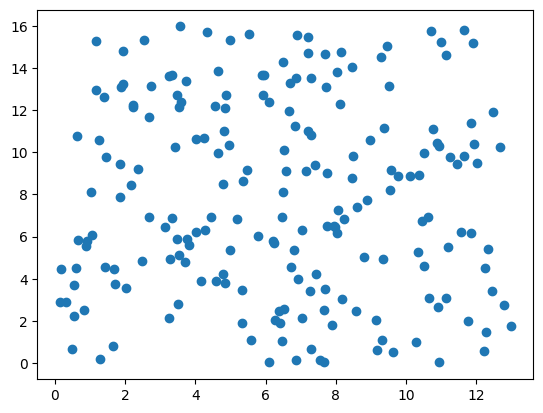

In [27]:
plt.scatter(*pts.transpose())

In [28]:
vor = Voronoi(pts)
verts = vor.vertices
shapes_ind = vor.regions

In [29]:
# this is a list of all the points that are the verticies in are diagram
verts[0:5, :]

array([[-1.29532904,  1.51734754],
       [ 8.54999799, 20.61686902],
       [ 8.20517585, 48.56245892],
       [ 7.79649827, 36.14214066],
       [ 0.21496462,  3.36137004]])

In [30]:
# Gives us the indicies into verts for the 10th polygon
shapes_ind[10]

[56, 29, 17, 15, 13, 55]

In [31]:
# gives us the points in R2 that actually form the 10 th polygon
verts[shapes_ind[10]]

array([[ 7.16699404, 12.96246482],
       [ 7.10265349, 12.60536868],
       [ 7.32052594, 12.40398594],
       [ 8.61017796, 13.06244103],
       [ 8.60872622, 13.12198773],
       [ 7.73409144, 13.52898095]])

In [32]:
"""
We are doing three things here
1. filtering out any empty shapes (len(s) == 0)
2. filtering out any shapes that go out of bounds (then it has an index of -1)
3. Closing the polygon by adding the last point back (so [1,2,3]->[1,2,3,1])
"""
shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
shapes = [verts[s] for s in shapes_ind]

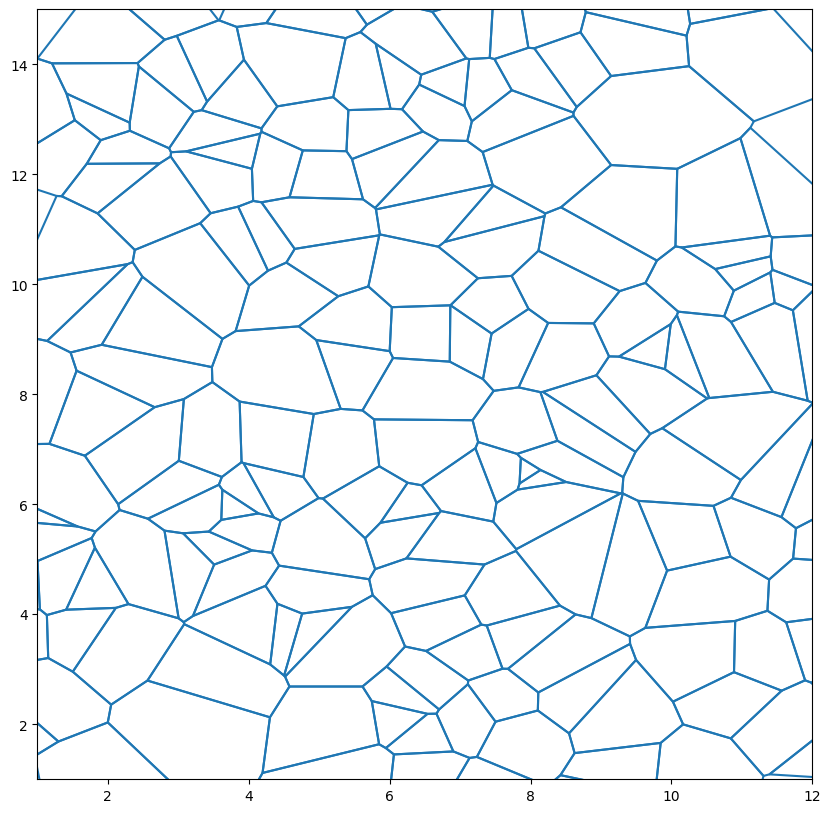

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(shapes)
ax.add_collection(lc)

In [34]:
# let's just look at one polygon

polygon_ind = 15
polygon = shapes[polygon_ind]

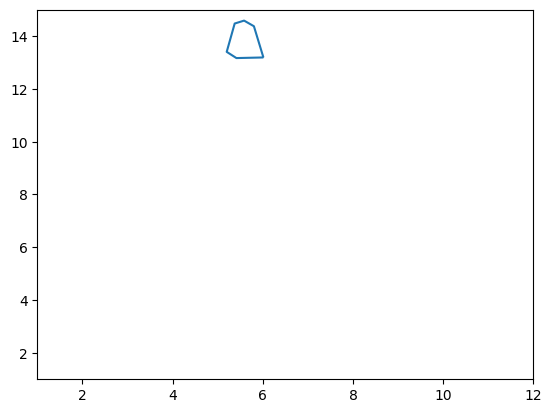

In [35]:
fig, ax = plt.subplots()
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection([polygon])
ax.add_collection(lc)

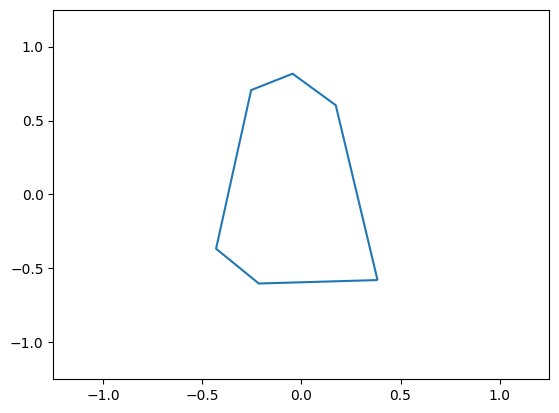

In [36]:
# now we can recenter it
center = np.mean(polygon, axis=0)


fig, ax = plt.subplots()
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
lc = LineCollection([polygon - center])
ax.add_collection(lc)

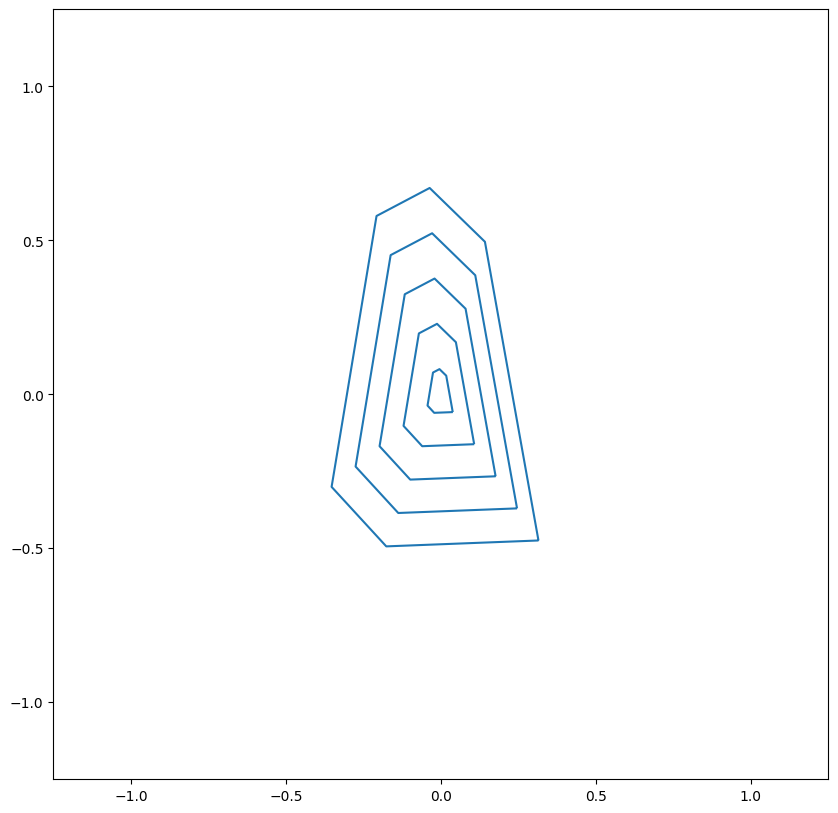

In [37]:
# now we can fill contract it

rescaled = []

n_fill_lines = 5
min_scalar = 0.1

for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
    scaled = scaler*(polygon - center)
    rescaled.append(scaled)
    
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
lc = LineCollection(rescaled)
ax.add_collection(lc)

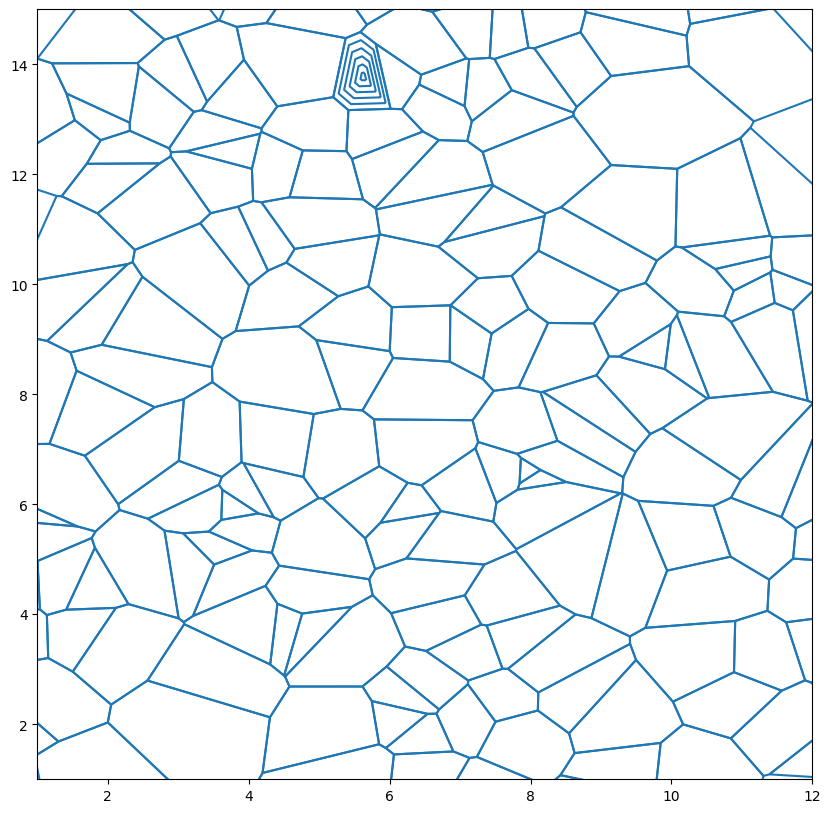

In [38]:
"""
So now we have the fill figured out, and we have to put it back into place!
"""

filled_polygon = shapes

n_fill_lines = 5
min_scalar = 0.1

for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
    scaled = scaler*(polygon - center) + center
    filled_polygon.append(scaled)
    
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(filled_polygon)
ax.add_collection(lc)

In [39]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from ipywidgets import widgets
from ipywidgets import interact, interact_manual, interactive

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
x_bounds = np.array([0, 13])
y_bounds = np.array([0, 16])

x_buffer, y_buffer = 1, 1

x_plot = x_bounds + np.array([x_buffer, -x_buffer])
y_plot = y_bounds + np.array([y_buffer, -y_buffer])


In [ ]:
def make_some_art(num_points=200, percent_to_fill = 0.5, n_fill_lines=5, min_scalar = 0.1,  debug=False, toggle_for_new=False):
    
    x = np.random.uniform(*x_bounds, size=num_points).reshape((num_points, 1))
    y = np.random.uniform(*y_bounds, size=num_points).reshape((num_points, 1))
    pts = np.hstack([x, y])
    
    vor = Voronoi(pts)
    verts = vor.vertices
    shapes_ind = vor.regions
    
    shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
    shapes = [verts[s] for s in shapes_ind]
    
    n_shapes_to_fill = int(percent_to_fill*len(shapes))
    shapes_to_fill = np.random.choice(shapes, size=n_shapes_to_fill, replace=False)
    
    fill = []
    
    for s in shapes_to_fill:
        center = np.mean(s, axis=0)
        for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
            scaled = scaler*(s - center) + center
            fill.append(scaled)

    
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_aspect('equal')
    
    if not debug:
        plt.grid(False)
        plt.axis('off')
        

    ax.set_xlim(*x_plot)
    ax.set_ylim(*y_plot)
    lc = LineCollection(shapes+fill)
    ax.add_collection(lc)
    
    return fig, ax
    
w = interactive(make_some_art,
                num_points=(10,1000,25),
                percent_to_fill=(0., 1., 0.05),
                n_fill_lines=(1, 20, 1),
                min_scalar=(0,1,0.01))
display(w)

NameError: name 'interactive' is not defined

In [ ]:
fig, ax = w.result

In [ ]:
fig.savefig('my_super_cool_art.svg', bbox_inches = 'tight', pad_inches = 0)